# LDA example

[Code source with comments](https://github.com/kapadias/medium-articles/blob/master/natural-language-processing/topic-modeling/Introduction%20to%20Topic%20Modeling.ipynb)

In [2]:
import zipfile
import pandas as pd
import os

# Open the zip file
with zipfile.ZipFile("./data/NIPS Papers.zip", "r") as zip_ref:
    # Extract the file to a temporary directory
    zip_ref.extractall("temp")

# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("temp/NIPS Papers/papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
1792,2004,A Direct Formulation for Sparse PCA Using Semi...,Abstract Missing,A direct formulation for sparse PCA\nusing sem...
4406,2013,Curvature and Optimal Algorithms for Learning ...,We investigate three related and important pro...,Curvature and Optimal Algorithms for Learning ...
6351,1993,Observability of Neural Network Behavior,Abstract Missing,Observability of Neural Network\nBehavior\nMax...
6193,2016,Error Analysis of Generalized Nystr?m Kernel R...,"Nystr\""{o}m method has been used successfully ...",Error Analysis of Generalized Nystr?m Kernel\n...
2844,2008,A rational model of preference learning and ch...,Young children demonstrate the ability to make...,A rational model of preference learning\nand c...


In [4]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

1792    a direct formulation for sparse pca\nusing sem...
4406    curvature and optimal algorithms for learning ...
6351    observability of neural network\nbehavior\nmax...
6193    error analysis of generalized nystrm kernel\nr...
2844    a rational model of preference learning\nand c...
Name: paper_text_processed, dtype: object

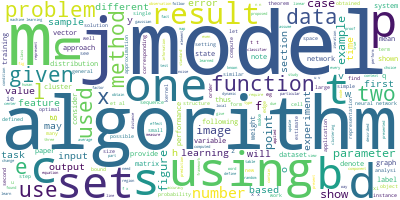

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [30]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['direct', 'formulation', 'sparse', 'pca', 'using', 'semidefinite', 'programming', 'alexandre', 'daspremont', 'eecs', 'dept', 'uc', 'berkeley', 'berkeley', 'ca', 'xorg', 'michael', 'jordan', 'eecs', 'statistics', 'depts', 'uc', 'berkeley', 'berkeley', 'ca', 'jordan', 'csberkeleyedu', 'laurent', 'el', 'ghaoui']


In [34]:
data_words[:1][0]

['direct',
 'formulation',
 'sparse',
 'pca',
 'using',
 'semidefinite',
 'programming',
 'alexandre',
 'daspremont',
 'eecs',
 'dept',
 'uc',
 'berkeley',
 'berkeley',
 'ca',
 'xorg',
 'michael',
 'jordan',
 'eecs',
 'statistics',
 'depts',
 'uc',
 'berkeley',
 'berkeley',
 'ca',
 'jordan',
 'csberkeleyedu',
 'laurent',
 'el',
 'ghaoui',
 'sac',
 'capital',
 'madison',
 'avenue',
 'new',
 'york',
 'ny',
 'laurentelghaoui',
 'saccom',
 'leave',
 'eecs',
 'uc',
 'berkeley',
 'gert',
 'lanckriet',
 'eecs',
 'dept',
 'uc',
 'berkeley',
 'berkeley',
 'ca',
 'gert',
 'eecsberkeleyedu',
 'abstract',
 'examine',
 'problem',
 'approximating',
 'frobenius',
 'norm',
 'sense',
 'positive',
 'semidefinite',
 'symmetric',
 'matrix',
 'rank',
 'one',
 'matrix',
 'upper',
 'bound',
 'cardinality',
 'eigenvector',
 'problem',
 'arises',
 'decomposition',
 'covariance',
 'matrix',
 'sparse',
 'factors',
 'wide',
 'applications',
 'ranging',
 'biology',
 'finance',
 'modification',
 'classical',
 'vari

In [8]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30]) #(token_id, token_count)

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 10), (19, 1), (20, 1), (21, 1), (22, 5), (23, 1), (24, 5), (25, 1), (26, 1), (27, 2), (28, 4), (29, 6)]


In [24]:
len(corpus), len(corpus[0]), len(corpus[0][0])

(100, 722, 2)

In [9]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"learning" + 0.006*"data" + 0.006*"set" + 0.005*"algorithm" + '
  '0.005*"model" + 0.004*"time" + 0.004*"using" + 0.003*"one" + 0.003*"models" '
  '+ 0.003*"function"'),
 (1,
  '0.006*"model" + 0.005*"function" + 0.004*"using" + 0.004*"set" + '
  '0.004*"learning" + 0.004*"algorithm" + 0.004*"data" + 0.004*"one" + '
  '0.004*"given" + 0.003*"used"'),
 (2,
  '0.007*"data" + 0.006*"time" + 0.005*"learning" + 0.005*"model" + '
  '0.004*"using" + 0.004*"algorithm" + 0.004*"function" + 0.003*"one" + '
  '0.003*"figure" + 0.003*"matrix"'),
 (3,
  '0.006*"data" + 0.005*"learning" + 0.005*"set" + 0.005*"model" + '
  '0.004*"using" + 0.004*"function" + 0.004*"two" + 0.004*"algorithm" + '
  '0.004*"one" + 0.004*"models"'),
 (4,
  '0.006*"model" + 0.005*"learning" + 0.005*"data" + 0.005*"algorithm" + '
  '0.005*"using" + 0.005*"set" + 0.004*"one" + 0.004*"function" + '
  '0.004*"figure" + 0.003*"problem"'),
 (5,
  '0.008*"learning" + 0.005*"data" + 0.005*"model" + 0.004*"function" +

In [18]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.006409  0.000458       1        1  14.918666
3     -0.006024 -0.005618       2        1  12.951096
5      0.007576  0.006273       3        1  12.945300
0      0.006266 -0.007823       4        1  10.338732
2      0.003138  0.002883       5        1  10.108858
7     -0.001177 -0.003090       6        1   9.286549
6     -0.000005 -0.001152       7        1   8.358470
1     -0.003958  0.006624       8        1   8.330388
9      0.004865 -0.001063       9        1   7.399500
8     -0.004272  0.002507      10        1   5.362441, topic_info=           Term         Freq        Total Category  logprob  loglift
389       model  1286.000000  1286.000000  Default  30.0000  30.0000
249    function   995.000000   995.000000  Default  29.0000  29.0000
1053   learning  1373.000000  1373.000000  Default  28.0000  28.0000
145        data  1278.000000  1278.000000  Default  27.0000  27.0000
676       using  1021.000000  1021.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
230      figure    32.429684   703.971470  Topic10  -5.9513  -0.1519
1574      input    29.525215   589.285369  Topic10  -6.0451  -0.0679
1321   training    28.070468   558.201116  Topic10  -6.0957  -0.0643
22         also    29.211134   648.715018  Topic10  -6.0558  -0.1747
162   different    26.577412   519.626306  Topic10  -6.1503  -0.0473

[859 rows x 6 columns], token_table=       Topic      Freq Term
term                       
6315       1  0.139166  abl
6315       2  0.208749  abl
6315       3  0.069583  abl
6315       4  0.278332  abl
6315       5  0.069583  abl
...      ...       ...  ...
14532      2  0.190423  ztb
14532      4  0.190423  ztb
14532     10  0.190423  ztb
15541      1  0.218040  zur
15541      6  0.218040  zur

[3906 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 6, 1, 3, 8, 7, 2, 10, 9])